# Análise e Previsão por Regressão Linear Para KLBN4

## Coeficientes Ajustados por um Algoritmo Genético

Documento criado por <b>Rodrigo Vertulo</b> em 18 de Novembro de 2019.

Neste documento será apresentada uma análise do ativo KLBN4 (Klabin) no período de 18/10/2019 até 18/11/2019 utilizando um modelo de Regressão Linear Simples com coeficientes ajustados por meio de um Algoritmo Genético. Para esse desenvolvimento foi utilizada a linguagem de programação Python com a <a href="https://github.com/rvertulo/PyGARV">Biblioteca para Algoritmos Genéticos PyGARV</a>.

A primeira etapa do projeto consiste em importar as bibliotecas necessárias para o trabalho.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PyGARV import *
import math

Agora é preciso carregar o dataset contendo os dados que serão analisados.

In [78]:
precos = pd.read_csv('dataset_klbn4_18-10-18-11.csv')

Vamos dar uma olhada no conteúdo do arquivo de dados exibindo as 10 primeiras linhas do mesmo.

In [79]:
precos.head(10)

,Data,Valor
0,18.10.2019,"3,02"
1,21.10.2019,3
2,22.10.2019,"3,06"
3,23.10.2019,"3,05"
4,24.10.2019,"3,07"
5,25.10.2019,"3,02"
6,28.10.2019,"2,93"
7,29.10.2019,"2,95"
8,30.10.2019,"2,96"
9,31.10.2019,"2,99"


Podemos observar que o arquivo é formado por duas colunas, uma chamada "Data" e outra "Valor". A coluna "Data" não será necessária para essa análise inicial, de modo que ela será removida.

In [80]:
precos.drop("Data", axis=1, inplace=True)
precos.head(10)

,Valor
0,"3,02"
1,3
2,"3,06"
3,"3,05"
4,"3,07"
5,"3,02"
6,"2,93"
7,"2,95"
8,"2,96"
9,"2,99"


A coluna valor apresenta como separador decimal o caractere "," e é necessário converte-lo para "." para que os cálculos matemáticos sejam feitos corretamente.

In [81]:
precos["Valor"] = precos["Valor"].str.replace(",", ".")
precos["Valor"] = precos["Valor"].astype("float")
precos.head(10)

,Valor
0,3.02
1,3.00
2,3.06
3,3.05
4,3.07
5,3.02
6,2.93
7,2.95
8,2.96
9,2.99


Agora vamos observar algumas informações estatísticas sobre a coluna "valor" do dataset.

In [82]:
precos.describe()

,Valor
count,21.000000
mean,3.175238
std,0.192682
min,2.930000
25%,3.020000
50%,3.070000
75%,3.390000
max,3.460000


Agora é possível traçar um gráfico de linhas de forma muito simples.

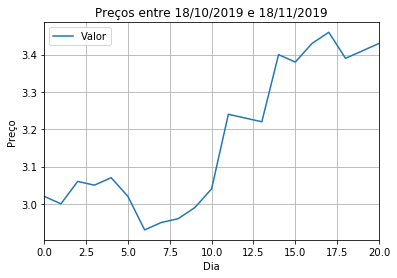

In [83]:
precos.plot()
plt.title("Preços entre 18/10/2019 e 18/11/2019")
plt.xlabel("Dia")
plt.ylabel("Preço")
plt.grid()
plt.show()

Para a criação da Regressão Linear, é mais interessante exibir os dados em um gráfico do tipo "scatter".

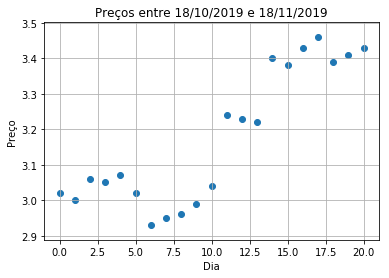

In [84]:
plt.scatter(np.arange(len(precos)), precos.iloc[::1])
plt.title("Preços entre 18/10/2019 e 18/11/2019")
plt.xlabel("Dia")
plt.ylabel("Preço")
plt.grid()
plt.show()

Com o dataset "preparado" é possível criar a classe que implementará o algoritmo genético para a criação do modelo de regressão linear.

In [57]:
class RegLinearKlabin(PyGARV):
    def __init__(self, precos):
        super().__init__(popSize=20,
                         values=3,
                         mutationRate=0.25,
                         fullMutation=True,
                         symmetricCut=False,
                         elitism=0.1,
                         digits=3)
        
        self.precos = precos
        
    def fitness(self, cromossomo):
        b0 = cromossomo[0] / 100
        
        sinalb1 = -1 if cromossomo[1] % 2 == 0 else 1
        b1 = sinalb1 * (cromossomo[2] / 100)

        err = self.erro(b0, b1)
        nota =  1000000000 - err
            
        if nota <= 0:
            nota = 0.001
            
        return [cromossomo, nota]
        
    def finishedGA(self, melhorCromossomo):
        self.b0 = melhorCromossomo[0] / 100
        
        sinalb1 = -1 if melhorCromossomo[1] % 2 == 0 else 1
        self.b1 = sinalb1 * (melhorCromossomo[2] / 100)

    def erro(self, b0, b1):
        erro = 0
        x = 0
        for i, p in self.precos.iterrows():
            erro = erro + math.sqrt(pow( (b0 + b1 * x) - p["Valor"], 2 ))
            x = x + 1
            
        return erro / x

O algoritmo genético será executado por 500 gerações para encontrar os coeficientes da regressão linear.

In [58]:
pygarv = RegLinearKlabin(precos.iloc[::1])
pygarv.runGA(500)

Depois que o algoritmo genético termina a execução de todas as gerações é possível verificar os valores dos coeficientes encontrados por ele.

In [59]:
print("b0: %f    b1:%f" % (pygarv.b0, pygarv.b1))

b0: 2.870000    b1:0.030000


Com os coeficientes calculados é possível gerar os valores para a plotagem da reta da regressão linear.

In [60]:
y = []
for x in range(len(precos)):
    y.append(pygarv.b0 + pygarv.b1 * x)

Finalmente é possível traçar o gráfico da regressão linear.

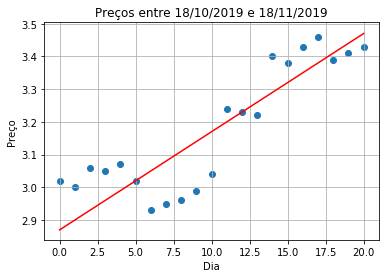

In [85]:
plt.title("Preços entre 18/10/2019 e 18/11/2019")
plt.xlabel("Dia")
plt.ylabel("Preço")
plt.grid()
plt.scatter(np.arange(len(precos)), precos.iloc[::1])
plt.plot(y, color = "r")
plt.show()

A reta da Regressão Linear obtida permite realizar a previsão do preço do ativo para o próximo dia.

In [74]:
previsao = pygarv.b0 + pygarv.b1 * len(precos)
print("Previsão do preço do ativo para o próximo dia: $%f" % (round(previsao, 2)))

Previsão do preço do ativo para o próximo dia: $3.500000


Apesar do ajuste da reta da regressão linear parecer bom, é importante ter em mente que há um erro inerente ao modelo. Os pontos do gráfico não são perfeitamente alinhados, de modo que o preço previsto utilizando-se esse modelo fica dentro de uma faixa de valores que pode ser obtida da seguinte forma:

In [66]:
erro = pygarv.erro(pygarv.b0, pygarv.b1)
erro

0.08238095238095233

A partir desse valor de erro é possível traçar um novo gráfico contemplando esse desvio.

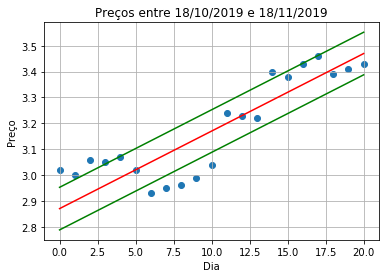

In [86]:
yDesvioAcima = []
for x in range(len(precos)):
    yDesvioAcima.append((pygarv.b0 + pygarv.b1 * x) + erro)
    
yDesvioAbaixo = []
for x in range(len(precos)):
    yDesvioAbaixo.append((pygarv.b0 + pygarv.b1 * x) - erro)
    
plt.title("Preços entre 18/10/2019 e 18/11/2019")
plt.xlabel("Dia")
plt.ylabel("Preço")
plt.grid()
plt.scatter(np.arange(len(precos)), precos.iloc[::1])
plt.plot(y, color = "r")
plt.plot(yDesvioAcima, color = "g")
plt.plot(yDesvioAbaixo, color = "g")
plt.show()

Com essa nova informação é possível definir com um pouco mais de precisão a faixa de valores em que o ativo se encontrará no próximo dia.

In [68]:
limiteInferior = previsao - erro
limiteSuperior = previsao + erro
print("Previsão do preço do ativo para o próximo dia: $%f <= $%f <= $%f" % (round(limiteInferior, 2), 
                                                                                 round(previsao, 2), 
                                                                                 round(limiteSuperior, 2)))

Previsão do preço do ativo para o próximo dia: $3.420000 <= $3.500000 <= $3.580000


Não podemos esquecer que os valores presentes no dataset apresentam um desvio padrão que pode ser muito útil para refinar a análise da previsão do preço. O desvio padrão pode ser obtido da seguinte forma:

In [69]:
desvioPadrao = precos.std()
desvioPadrao

Valor    0.192682
dtype: float64

Da mesma forma que foi feito com o valor do erro, é possível inserir no gráfico a informação do desvio padrão.

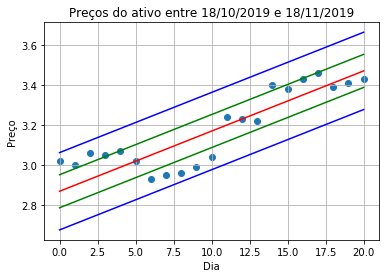

In [87]:
yDesvioPAcima = []
for x in range(len(precos)):
    yDesvioPAcima.append((pygarv.b0 + pygarv.b1 * x) + desvioPadrao)
    
yDesvioPAbaixo = []
for x in range(len(precos)):
    yDesvioPAbaixo.append((pygarv.b0 + pygarv.b1 * x) - desvioPadrao)
    
plt.title("Preços do ativo entre 18/10/2019 e 18/11/2019")
plt.xlabel("Dia")
plt.ylabel("Preço")
plt.scatter(np.arange(len(precos)), precos.iloc[::1])
plt.plot(y, color = "r")
plt.plot(yDesvioPAcima, color = "b")
plt.plot(yDesvioPAbaixo, color = "b")
plt.plot(yDesvioAcima, color = "g")
plt.plot(yDesvioAbaixo, color = "g")
plt.grid()
plt.show()

Agora é possível refinar ainda mais a previsão para o preço do ativo para o próximo dia.

In [71]:
limiteInferior = previsao - desvioPadrao
limiteSuperior = previsao + desvioPadrao
print("Previsão do preço do ativo para o próximo dia: $%f <= $%f <= $%f" % (round(limiteInferior, 2), 
                                                                                 round(previsao, 2), 
                                                                                 round(limiteSuperior, 2)))

Previsão do preço do ativo para o próximo dia: $3.310000 <= $3.500000 <= $3.690000


## Conclusão

De posse de todos esses dados agora é possível fazer uma análise um pouco mais racional sobre o que pode acontecer com o preço do ativo a partir do próximo dia. Vale lembrar que essa avaliação não é recomendação de compra ou venda do ativo, sendo apenas conclusões pessoais obtidas a partir desse estudo.

Pelos resultados obtidos é possível afirmar que o ativo se encontra em uma clara tendência de alta, tendo em vista a inclinação positiva da reta da regressão linear. Também é possível acreditar que essa tendência se manterá enquanto o valor do ativo se mantiver acima de 3,42. Preços abaixo de 3,42 podem indicar uma tentativa de reversão da tendência exigindo atenção por parte do investidor para uma eventual saída da aplicação.

Uma compra do ativo poderia ser feita quando o preço ficar um pouco acima de 3,31 e abaixo de 3,42 e a venda quando ficar entre 3,58 e 3,69.

Obs: Todos os valores em Reais.